In [9]:
# 导入必要的库
import torch  # PyTorch深度学习框架
import torchvision  # PyTorch的计算机视觉库，包含常用数据集、模型和数据增强等
import numpy as np  # 用于数值计算的库
import matplotlib.pyplot as plt  # 用于绘图的库
from tqdm import tqdm
import time
from torchvision import datasets, transforms  # 导入数据集和数据转换工具


 10%|█         | 10/100 [00:00<00:00, 96.10it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


 40%|████      | 40/100 [00:00<00:00, 94.71it/s]

19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


 50%|█████     | 50/100 [00:00<00:00, 94.62it/s]

40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


 70%|███████   | 70/100 [00:00<00:00, 94.96it/s]

59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78


 90%|█████████ | 90/100 [00:00<00:00, 94.66it/s]

79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


100%|██████████| 100/100 [00:01<00:00, 94.64it/s]

98
99


使用设备: cpu


轮次 [1/5] 验证: 100%|██████████| 79/79 [00:00<00:00, 105.74it/s, 损失=1.1888]


轮次 1/5 完成! 训练损失: 0.8581, 训练准确率: 68.53%, 验证损失: 0.4926, 验证准确率: 82.38%


轮次 [2/5] 验证: 100%|██████████| 79/79 [00:00<00:00, 97.72it/s, 损失=1.2441] 


轮次 2/5 完成! 训练损失: 0.4713, 训练准确率: 83.08%, 验证损失: 0.4118, 验证准确率: 85.68%


轮次 [3/5] 验证: 100%|██████████| 79/79 [00:00<00:00, 110.21it/s, 损失=1.0249]


轮次 3/5 完成! 训练损失: 0.4146, 训练准确率: 85.04%, 验证损失: 0.3872, 验证准确率: 86.18%


轮次 [4/5] 验证: 100%|██████████| 79/79 [00:00<00:00, 106.79it/s, 损失=1.0665]


轮次 4/5 完成! 训练损失: 0.3874, 训练准确率: 86.00%, 验证损失: 0.3751, 验证准确率: 86.48%


轮次 [5/5] 验证: 100%|██████████| 79/79 [00:00<00:00, 104.22it/s, 损失=0.9222]


轮次 5/5 完成! 训练损失: 0.3662, 训练准确率: 86.51%, 验证损失: 0.3871, 验证准确率: 84.88%


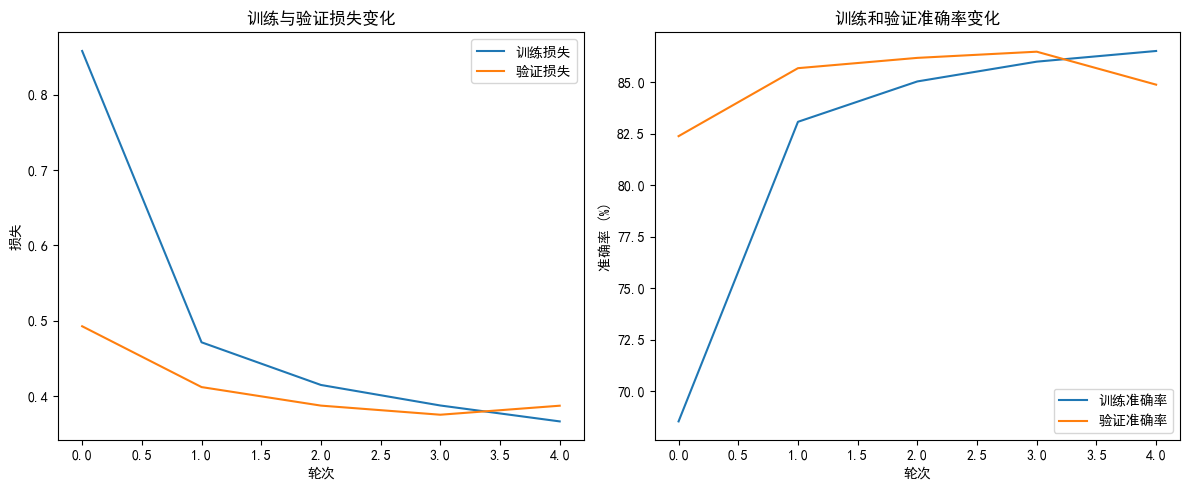

In [12]:

# 定义数据预处理转换
transform = transforms.Compose([
    transforms.ToTensor()  # 将图片转换为张量，并自动将像素值归一化到[0,1]范围
])

# 加载Fashion-MNIST数据集
train_dataset = datasets.FashionMNIST(
    root='./data',       # 数据集保存路径
    train=True,          # 加载训练集
    download=True,       # 如果数据不存在则下载
    transform=transform  # 应用数据转换
)

test_dataset = datasets.FashionMNIST(
    root='./data',       # 数据集保存路径
    train=False,         # 加载测试集
    download=True,       # 如果数据不存在则下载
    transform=transform  # 应用数据转换
)


# 将PyTorch张量转换为NumPy数组以便进行预处理
train_images = train_dataset.data.numpy()  # 训练图像数据转换为NumPy数组
train_labels = train_dataset.targets.numpy()  # 训练标签转换为NumPy数组
test_images = test_dataset.data.numpy()  # 测试图像数据转换为NumPy数组
test_labels = test_dataset.targets.numpy()  # 测试标签转换为NumPy数组


# 定义Fashion-MNIST数据集的10个类别名称
class_names = [
    'T-shirt/top',  # 0: T恤/上衣
    '裤子',         # 1: 裤子
    '套头衫',       # 2: 套头衫
    '连衣裙',       # 3: 连衣裙
    '外套',         # 4: 外套
    '凉鞋',         # 5: 凉鞋
    '衬衫',         # 6: 衬衫
    '运动鞋',       # 7: 运动鞋
    '包',           # 8: 包
    '短靴'          # 9: 短靴
]


train_labels[0:20]

# 使用MinMaxScaler对图像数据进行归一化处理
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # 创建MinMaxScaler实例，将数据缩放到[0,1]范围

# 对训练图像进行归一化
# 1. reshape(-1, train_images.shape[-1]): 将图像展平为2D数组
# 2. fit_transform: 计算缩放参数并应用
# 3. reshape(train_images.shape): 恢复原始形状
train_images = scaler.fit_transform(train_images.reshape(-1, train_images.shape[-1])).reshape(train_images.shape)

# 对测试图像进行归一化
# 使用在训练集上计算的缩放参数
test_images = scaler.transform(test_images.reshape(-1, test_images.shape[-1])).reshape(test_images.shape)


# 划分训练集和验证集
train_size = 55000  # 训练集样本数量
val_size = 5000     # 验证集样本数量

# 使用PyTorch的random_split函数将原始训练集划分为训练集和验证集
from torch.utils.data import Dataset
train_dataset, val_dataset = torch.utils.data.random_split(
    train_dataset,           # 要划分的数据集
    [train_size, val_size]   # 每个子集的大小
)

# 创建数据加载器(DataLoader)
# DataLoader用于批量加载数据，支持随机打乱、多进程加载等功能

# 训练集的DataLoader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,  # 数据集
    batch_size=64,         # 每批处理的样本数
    shuffle=True           # 随机打乱数据
)

# 验证集的DataLoader
val_loader = torch.utils.data.DataLoader(
    dataset=val_dataset,   # 数据集
    batch_size=64,         # 每批处理的样本数
    shuffle=False          # 验证集不需要打乱数据
)



# 导入PyTorch神经网络相关模块
import torch.nn as nn                # 包含神经网络层的基类和常用层的实现
import torch.nn.functional as F      # 包含激活函数和其他函数操作
import torch.optim as optim         # 包含各种优化器的实现

# 定义Fashion-MNIST分类网络
class FashionMNISTNet(nn.Module):
    """
    一个用于Fashion-MNIST图像分类的全连接神经网络
    网络结构：输入层(784) -> 全连接层(512) -> 全连接层(256) -> 全连接层(128) -> 输出层(10)
    每个隐藏层后都使用ReLU激活函数和Dropout正则化
    """
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        # 定义网络层
        self.fc1 = nn.Linear(28*28, 512)    # 第一个全连接层：输入784(28x28像素)，输出512个神经元
        self.fc2 = nn.Linear(512, 256)      # 第二个全连接层：输入512，输出256个神经元
        self.fc3 = nn.Linear(256, 128)      # 第三个全连接层：输入256，输出128个神经元
        self.fc4 = nn.Linear(128, 10)       # 输出层：输入128，输出10个类别
        self.dropout = nn.Dropout(0.2)      # Dropout层：随机丢弃20%的神经元，防止过拟合
        
    def forward(self, x):
        """
        前向传播函数
        参数:
            x: 输入图像张量，形状为(batch_size, 1, 28, 28)
        返回:
            x: 输出预测张量，形状为(batch_size, 10)
        """
        x = x.view(-1, 28*28)              # 将输入图像展平：(batch_size, 1, 28, 28) -> (batch_size, 784)
        
        # 第一层：全连接 -> ReLU激活 -> Dropout
        x = F.relu(self.fc1(x))            # 线性变换后应用ReLU激活函数
        x = self.dropout(x)                # 应用dropout防止过拟合
        
        # 第二层：全连接 -> ReLU激活 -> Dropout
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        # 第三层：全连接 -> ReLU激活 -> Dropout
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        
        # 输出层：全连接（不使用激活函数，因为后面会用交叉熵损失）
        x = self.fc4(x)
        return x

# 创建模型实例
model = FashionMNISTNet()

# 检测并设置计算设备（GPU/CPU）
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 将模型移动到指定设备（GPU/CPU）
model = model.to(device)

# 定义训练所需的损失函数和优化器
criterion = nn.CrossEntropyLoss()                                    # 交叉熵损失函数，适用于多分类问题
optimizer = optim.SGD(model.parameters(),                           # 随机梯度下降优化器
                     lr=0.01,                                       # 学习率
                     momentum=0.9)                                  # 动量因子，帮助优化器跳出局部最小值


def evaluate_model(model, data_loader, device):
    """
    评估模型在给定数据集上的准确率
    
    参数:
        model: 需要评估的模型
        data_loader: 数据加载器
        device: 计算设备(CPU/GPU)
    
    返回:
        accuracy: 模型准确率
    """
    model.eval()  # 设置为评估模式
    correct = 0
    total = 0
    
    with torch.no_grad():  # 不计算梯度
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1) #torch.max(outputs.data, 1)返回两个值，第一个是最大值，第二个是最大值的索引
            total += labels.size(0) #labels.size(0)返回标签的维度，这里返回的是batch_size，因为每个批次有batch_size个标签
            correct += (predicted == labels).sum().item() #(predicted == labels).sum().item()返回预测正确的标签的个数
    
    accuracy = 100 * correct / total #计算准确率
    print(f"测试集准确率: {accuracy:.2f}%")
    return accuracy

def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=20):
    """
    训练模型函数
    
    参数:
        model: 要训练的模型
        train_loader: 训练数据加载器
        val_loader: 验证数据加载器
        criterion: 损失函数
        optimizer: 优化器
        device: 计算设备(CPU/GPU)
        num_epochs: 训练轮数
        
    返回:
        model: 训练好的模型
        history: 训练历史数据，包含每轮的损失和准确率
    """
    # 记录训练历史
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    # 训练循环
    best_val_acc = 0
    patience = 5
    counter = 0
    
    for epoch in range(num_epochs):
        model.train()  # 设置为训练模式
        running_loss = 0.0
        correct = 0
        total = 0
        
        # 使用tqdm可视化训练进度
        train_pbar = tqdm(train_loader, desc=f'轮次 [{epoch+1}/{num_epochs}] 训练', leave=True)
        # 训练一个epoch,把55000全部训练一遍
        for i, (images, labels) in enumerate(train_pbar):
            images, labels = images.to(device), labels.to(device)
            
            # 梯度清零
            optimizer.zero_grad()
            
            # 前向传播
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # 反向传播与优化
            loss.backward() #反向传播，计算梯度
            optimizer.step() #优化器更新参数
            
            # 统计损失和准确率
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # 更新进度条信息
            train_pbar.set_postfix({'损失': f'{loss.item():.4f}'})
        
        # 计算当前epoch的平均损失和准确率
        epoch_train_loss = running_loss / len(train_loader)
        epoch_train_acc = 100 * correct / total
        
        # 评估验证集
        model.eval()  # 设置为评估模式
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        # 使用tqdm可视化验证进度
        val_pbar = tqdm(val_loader, desc=f'轮次 [{epoch+1}/{num_epochs}] 验证', leave=True)
        with torch.no_grad():  # 不计算梯度
            for images, labels in val_pbar:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                
                # 更新进度条信息
                val_pbar.set_postfix({'损失': f'{loss.item():.4f}'})
        
        epoch_val_loss = val_loss / len(val_loader)
        epoch_val_acc = 100 * val_correct / val_total
        
        # 早停检查
        if epoch_val_acc > best_val_acc:
            best_val_acc = epoch_val_acc
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f'早停! 验证准确率已连续{patience}轮未提升')
                break
        # 记录历史数据
        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc)
        history['val_loss'].append(epoch_val_loss)
        history['val_acc'].append(epoch_val_acc)
        
        print(f'轮次 {epoch+1}/{num_epochs} 完成! 训练损失: {epoch_train_loss:.4f}, 训练准确率: {epoch_train_acc:.2f}%, 验证损失: {epoch_val_loss:.4f}, 验证准确率: {epoch_val_acc:.2f}%')
    # 绘制训练历史
    def plot_training_history(history):
        plt.figure(figsize=(12, 5))
        
        # 设置中文字体
        plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
        plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
        
        # 绘制损失曲线
        plt.subplot(1, 2, 1)
        plt.plot(history['train_loss'], label='训练损失')
        plt.plot(history['val_loss'], label='验证损失')
        plt.xlabel('轮次')
        plt.ylabel('损失')
        plt.title('训练与验证损失变化')
        plt.legend()
        
        # 绘制准确率曲线
        plt.subplot(1, 2, 2)
        plt.plot(history['train_acc'], label='训练准确率')
        plt.plot(history['val_acc'], label='验证准确率')
        plt.xlabel('轮次')
        plt.ylabel('准确率 (%)')
        plt.title('训练和验证准确率变化')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
    
    # 调用函数绘制训练历史
    plot_training_history(history)
    
    return model, history

# 开始训练模型
model, history = train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=5)


In [8]:
evaluate_model(model, val_loader, device)


测试集准确率: 90.22%


90.22

In [66]:
# 保存训练好的模型参数
torch.save(model.state_dict(),                  # 保存模型的参数（权重和偏置）
          'fashion_mnist_model.pth')            # 保存的文件名
print("模型已保存为 'fashion_mnist_model.pth'")

# 保存训练过程中的历史数据（损失和准确率）
import pickle
with open('fashion_mnist_history.pkl', 'wb') as f:
    pickle.dump(history,                        # 要保存的历史数据字典
               f)                               # 文件对象
print("训练历史已保存为 'fashion_mnist_history.pkl'")


模型已保存为 'fashion_mnist_model.pth'
训练历史已保存为 'fashion_mnist_history.pkl'


使用设备: cpu
特征数量: 8
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


轮次 [1/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 433.83it/s, 损失=0.3770]



轮次 1/50, 训练损失: 1.2583, 验证损失: 0.5820



轮次 [2/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 423.15it/s, 损失=0.2443]



轮次 2/50, 训练损失: 0.4790, 验证损失: 0.4422



轮次 [3/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 314.52it/s, 损失=0.2070]



轮次 3/50, 训练损失: 0.4090, 验证损失: 0.4188



轮次 [4/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 345.34it/s, 损失=0.2304]



轮次 4/50, 训练损失: 0.3838, 验证损失: 0.3830



轮次 [5/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 437.28it/s, 损失=0.2034]



轮次 5/50, 训练损失: 0.3662, 验证损失: 0.3775



轮次 [6/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 435.56it/s, 损失=0.1992]



轮次 6/50, 训练损失: 0.3625, 验证损失: 0.3610



轮次 [7/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 349.99it/s, 损失=0.2056]



轮次 7/50, 训练损失: 0.3448, 验证损失: 0.3513



轮次 [8/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 363.17it/s, 损失=0.2357]



轮次 8/50, 训练损失: 0.3384, 验证损失: 0.3529



轮次 [9/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 516.87it/s, 损失=0.2183]



轮次 9/50, 训练损失: 0.3290, 验证损失: 0.3867



轮次 [10/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 451.27it/s, 损失=0.2068]



轮次 10/50, 训练损失: 0.3240, 验证损失: 0.3361



轮次 [11/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 375.53it/s, 损失=0.2463]



轮次 11/50, 训练损失: 0.3228, 验证损失: 0.3339



轮次 [12/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 355.86it/s, 损失=0.2362]



轮次 12/50, 训练损失: 0.3130, 验证损失: 0.3269



轮次 [13/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 373.42it/s, 损失=0.2169]



轮次 13/50, 训练损失: 0.3142, 验证损失: 0.3312



轮次 [14/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 513.69it/s, 损失=0.2391]



轮次 14/50, 训练损失: 0.3058, 验证损失: 0.3273



轮次 [15/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 504.35it/s, 损失=0.2213]



轮次 15/50, 训练损失: 0.3095, 验证损失: 0.3162



轮次 [16/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 438.44it/s, 损失=0.2276]



轮次 16/50, 训练损失: 0.3110, 验证损失: 0.3188



轮次 [17/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 421.51it/s, 损失=0.2477]



轮次 17/50, 训练损失: 0.3030, 验证损失: 0.3250



轮次 [18/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 363.05it/s, 损失=0.2384]



轮次 18/50, 训练损失: 0.3003, 验证损失: 0.3149



轮次 [19/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 407.39it/s, 损失=0.2569]



轮次 19/50, 训练损失: 0.2952, 验证损失: 0.3210



轮次 [20/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 362.20it/s, 损失=0.2288]



轮次 20/50, 训练损失: 0.2951, 验证损失: 0.3244



轮次 [21/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 515.10it/s, 损失=0.2142]



轮次 21/50, 训练损失: 0.2937, 验证损失: 0.3056



轮次 [22/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 401.00it/s, 损失=0.2208]



轮次 22/50, 训练损失: 0.2911, 验证损失: 0.3078



轮次 [23/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 386.50it/s, 损失=0.2155]



轮次 23/50, 训练损失: 0.2944, 验证损失: 0.3081



轮次 [24/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 384.78it/s, 损失=0.2249]



轮次 24/50, 训练损失: 0.2996, 验证损失: 0.3078



轮次 [25/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 442.92it/s, 损失=0.2238]



轮次 25/50, 训练损失: 0.2909, 验证损失: 0.3074



轮次 [26/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 452.46it/s, 损失=0.2134]



轮次 26/50, 训练损失: 0.2861, 验证损失: 0.3023



轮次 [27/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 355.71it/s, 损失=0.1714]



轮次 27/50, 训练损失: 0.2845, 验证损失: 0.3067



轮次 [28/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 367.12it/s, 损失=0.2253]



轮次 28/50, 训练损失: 0.2838, 验证损失: 0.2991



轮次 [29/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 449.64it/s, 损失=0.2096]



轮次 29/50, 训练损失: 0.2830, 验证损失: 0.3006



轮次 [30/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 449.56it/s, 损失=0.1999]



轮次 30/50, 训练损失: 0.2824, 验证损失: 0.3023



轮次 [31/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 336.81it/s, 损失=0.2002]



轮次 31/50, 训练损失: 0.2801, 验证损失: 0.3028



轮次 [32/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 394.91it/s, 损失=0.1987]



轮次 32/50, 训练损失: 0.2796, 验证损失: 0.3035



轮次 [33/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 478.44it/s, 损失=0.2044]



轮次 33/50, 训练损失: 0.2820, 验证损失: 0.2960



轮次 [34/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 325.72it/s, 损失=0.2146]



轮次 34/50, 训练损失: 0.2751, 验证损失: 0.2996



轮次 [35/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 382.43it/s, 损失=0.2207]



轮次 35/50, 训练损失: 0.2753, 验证损失: 0.2991



轮次 [36/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 375.91it/s, 损失=0.1690]



轮次 36/50, 训练损失: 0.2738, 验证损失: 0.2939



轮次 [37/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 408.55it/s, 损失=0.1918]



轮次 37/50, 训练损失: 0.2729, 验证损失: 0.2923



轮次 [38/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 516.18it/s, 损失=0.1615]



轮次 38/50, 训练损失: 0.2720, 验证损失: 0.2973



轮次 [39/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 366.44it/s, 损失=0.1815]



轮次 39/50, 训练损失: 0.2702, 验证损失: 0.2896



轮次 [40/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 411.52it/s, 损失=0.2068]



轮次 40/50, 训练损失: 0.2695, 验证损失: 0.2945



轮次 [41/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 502.58it/s, 损失=0.1804]



轮次 41/50, 训练损失: 0.2693, 验证损失: 0.2948



轮次 [42/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 480.31it/s, 损失=0.1900]



轮次 42/50, 训练损失: 0.2697, 验证损失: 0.2971



轮次 [43/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 417.83it/s, 损失=0.2256]



轮次 43/50, 训练损失: 0.2744, 验证损失: 0.2929



轮次 [44/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 413.21it/s, 损失=0.1853]



轮次 44/50, 训练损失: 0.2666, 验证损失: 0.2884



轮次 [45/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 387.29it/s, 损失=0.2193]



轮次 45/50, 训练损失: 0.2700, 验证损失: 0.3134



轮次 [46/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 521.78it/s, 损失=0.1704]



轮次 46/50, 训练损失: 0.2662, 验证损失: 0.3171



轮次 [47/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 495.84it/s, 损失=0.2248]



轮次 47/50, 训练损失: 0.2663, 验证损失: 0.2884



轮次 [48/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 452.40it/s, 损失=0.2094]



轮次 48/50, 训练损失: 0.2641, 验证损失: 0.2857



轮次 [49/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 427.23it/s, 损失=0.1970]



轮次 49/50, 训练损失: 0.2644, 验证损失: 0.2893



轮次 [50/50] 验证: 100%|██████████| 65/65 [00:00<00:00, 411.71it/s, 损失=0.2378]



轮次 50/50, 训练损失: 0.2622, 验证损失: 0.3210



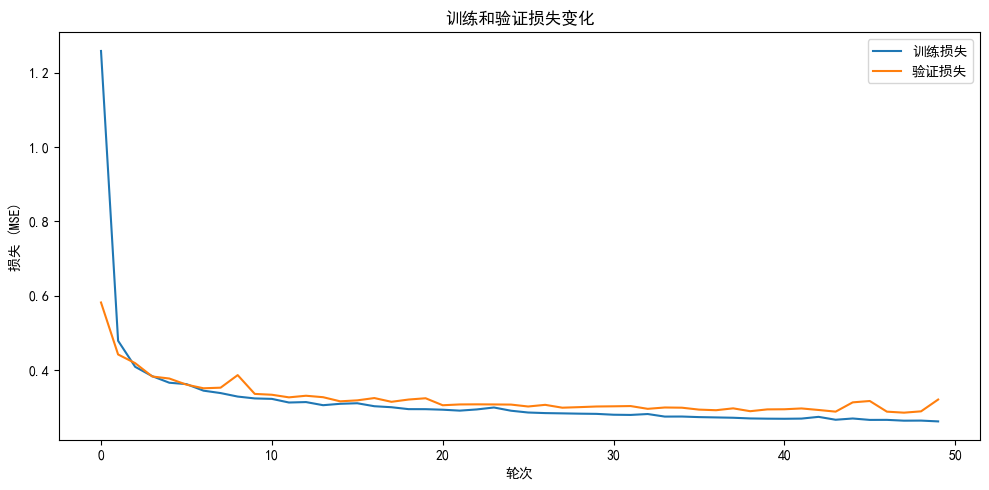

测试集均方误差 (MSE): 0.3210
测试集均方根误差 (RMSE): 0.5666


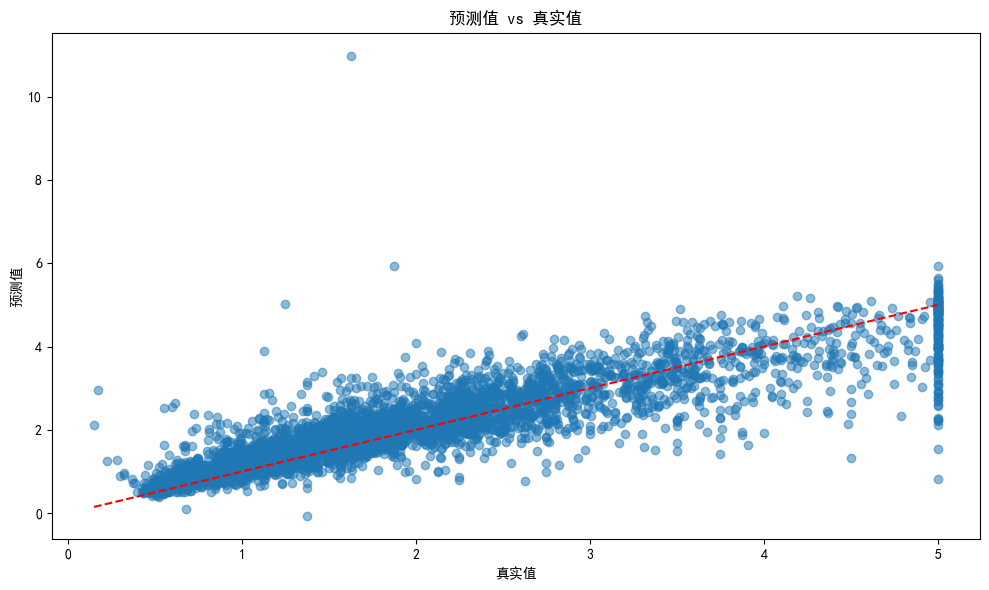

模型已保存为 'california_housing_model.pth'


In [13]:
# 加载加利福尼亚房价数据集并实现回归模型

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# 1. 数据加载和预处理
def load_california_housing_data(test_size=0.2, random_state=42):
    """
    加载加利福尼亚房价数据集并进行预处理
    
    参数:
        test_size: 测试集比例
        random_state: 随机种子
    
    返回:
        训练集和测试集的数据加载器
    """
    # 加载数据集
    housing = fetch_california_housing()
    X, y = housing.data, housing.target
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # 标准化特征
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # 转换为PyTorch张量
    X_train = torch.FloatTensor(X_train)
    y_train = torch.FloatTensor(y_train).reshape(-1, 1)
    X_test = torch.FloatTensor(X_test)
    y_test = torch.FloatTensor(y_test).reshape(-1, 1)
    
    # 创建数据集和数据加载器
    class HousingDataset(Dataset):
        def __init__(self, X, y):
            self.X = X
            self.y = y
            
        def __len__(self):
            return len(self.X)
        
        def __getitem__(self, idx):
            return self.X[idx], self.y[idx]
    
    train_dataset = HousingDataset(X_train, y_train)
    test_dataset = HousingDataset(X_test, y_test)
    
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    
    return train_loader, test_loader, housing.feature_names

# 2. 模型定义
class HousingRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(HousingRegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.model(x)

# 3. 训练模型
def train_regression_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=100):
    """
    训练回归模型
    
    参数:
        model: 模型
        train_loader: 训练数据加载器
        test_loader: 测试数据加载器
        criterion: 损失函数
        optimizer: 优化器
        device: 设备(CPU/GPU)
        num_epochs: 训练轮次
    
    返回:
        训练好的模型和训练历史
    """
    model.to(device)
    history = {
        'train_loss': [],
        'val_loss': []
    }
    
    for epoch in range(num_epochs):
        # 训练阶段
        model.train()
        train_loss = 0.0
        train_pbar = tqdm(train_loader, desc=f'轮次 [{epoch+1}/{num_epochs}] 训练')
        
        for inputs, targets in train_pbar:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # 前向传播
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # 反向传播和优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            train_pbar.set_postfix(损失=f"{loss.item():.4f}")
        
        avg_train_loss = train_loss / len(train_loader)
        history['train_loss'].append(avg_train_loss)
        
        # 验证阶段
        model.eval()
        val_loss = 0.0
        val_pbar = tqdm(test_loader, desc=f'轮次 [{epoch+1}/{num_epochs}] 验证')
        
        with torch.no_grad():
            for inputs, targets in val_pbar:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                val_pbar.set_postfix(损失=f"{loss.item():.4f}")
        
        avg_val_loss = val_loss / len(test_loader)
        history['val_loss'].append(avg_val_loss)
        
        print(f"\n轮次 {epoch+1}/{num_epochs}, 训练损失: {avg_train_loss:.4f}, 验证损失: {avg_val_loss:.4f}\n")
    
    # 绘制训练历史
    plt.figure(figsize=(10, 5))
    plt.plot(history['train_loss'], label='训练损失')
    plt.plot(history['val_loss'], label='验证损失')
    plt.xlabel('轮次')
    plt.ylabel('损失 (MSE)')
    plt.title('训练和验证损失变化')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return model, history

# 4. 评估模型
def evaluate_regression_model(model, test_loader, device):
    """
    评估回归模型
    
    参数:
        model: 模型
        test_loader: 测试数据加载器
        device: 设备(CPU/GPU)
    
    返回:
        均方误差(MSE)和均方根误差(RMSE)
    """
    model.eval()
    criterion = nn.MSELoss()
    total_loss = 0.0
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            
            all_preds.extend(outputs.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    
    mse = total_loss / len(test_loader)
    rmse = np.sqrt(mse)
    
    print(f"测试集均方误差 (MSE): {mse:.4f}")
    print(f"测试集均方根误差 (RMSE): {rmse:.4f}")
    
    # 绘制预测值与真实值的散点图
    plt.figure(figsize=(10, 6))
    plt.scatter(all_targets, all_preds, alpha=0.5)
    plt.plot([min(all_targets), max(all_targets)], [min(all_targets), max(all_targets)], 'r--')
    plt.xlabel('真实值')
    plt.ylabel('预测值')
    plt.title('预测值 vs 真实值')
    plt.tight_layout()
    plt.show()
    
    return mse, rmse

# 5. 主函数：执行完整的训练和评估流程
def main():
    # 设置设备
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"使用设备: {device}")
    
    # 加载数据
    train_loader, test_loader, feature_names = load_california_housing_data()
    print(f"特征数量: {len(feature_names)}")
    print(f"特征名称: {feature_names}")
    
    # 创建模型
    input_size = len(feature_names)
    model = HousingRegressionModel(input_size)
    
    # 定义损失函数和优化器
    criterion = nn.MSELoss()#均方误差
    optimizer = optim.Adam(model.parameters(), lr=0.001)#Adam优化器
    
    # 训练模型
    model, history = train_regression_model(
        model, train_loader, test_loader, criterion, optimizer, device, num_epochs=50
    )
    
    # 评估模型
    mse, rmse = evaluate_regression_model(model, test_loader, device)
    
    # 保存模型
    torch.save(model.state_dict(), 'california_housing_model.pth')
    print("模型已保存为 'california_housing_model.pth'")

# 执行主函数
if __name__ == "__main__":
    main()
else:
    # 在Jupyter Notebook中直接执行
    main()
